In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-on Activity 12.1: Bayesian Parameter Estimation

## Objective
+ Introduce Bayesian parameter estimation via an analytical example

## Example: Inferring the probability of a coin toss from data

A coin with unknown probability of heads $\theta$ is tossed $N$ times independently and you observe the result:
$$
x_{1:N} := (x_1,\dots,x_N).
$$
Assume that we have coded the result so that heads corresponds to a "0" and tails to a "1."
Our goal is to estimate the probability of heads $\theta$ from this dataset.

Assuming that we know nothing, we set:
$$
\theta \sim U([0,1]).
$$
In terms of probability densities this:
$$
p(\theta) = 
\begin{cases}
1,&\;\text{if}\;\theta\in [0,1],\\
0,&\;\text{otherwise}
\end{cases} =
1_{[0,1]}(\theta),
$$
where we used the indicator function to simplify the notation.

Now, let's write down the likelihood of the data.
Because of the independence assumption, we have:
$$
p(x_{1:N}|\theta) = \prod_{n=1}^Np(x_n|\theta).
$$
Then, each measurement is a Bernoulli with probability of success $\theta$, i.e.,
$$
x_n | \theta \sim \operatorname{Bernoulli}(\theta).
$$
In terms of probability densities, we have:
$$
p(x_n|\theta)
= \begin{cases}
\theta,&\;\text{if}\;x_n=0,\\
1-\theta,&\;\text{otherwise}.
\end{cases}
$$
Using a common mathematical trick, we can rewrite this as:
$$
p(x_n|\theta) = \theta^{x_n}(1-\theta)^{1-x_n}.
$$
Work out the cases $x_n=0$ and $x_n=1$ to convience yourself.

Now we can find the expression for the likelihood of the entire dataset.
It is
$$
\begin{split}
p(x_{1:N}|\theta) &=& \prod_{n=1}^Np(x_n|\theta)\\
&=& \prod_{n=1}^N\theta^{x_n}(1-\theta)^{1-x_n}\\
&=& \theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^N}.
\end{split}
$$
This has the intuitive meaning that it is the probability of getting $\sum_{n=1}^Nx_n$ heads and the rest $N-\sum_{n=1}^Nx_n$ tails.

We can now find the posterior.
It is:
$$
\text{posterior} \propto \text{likelihood}\times\text{prior}.
$$
In our problem:
$$
\begin{split}
p(\theta|x_{1:N}) &\propto& p(x_{1:N}|\theta)p(\theta)\\
&=& \theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^N} 1_{[0,1]}(\theta)\\
&=& \begin{cases}
\theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^N},&\;\text{if}\;\theta\in[0,1]\\
0,&\;\text{otherwise}.
\end{cases}
\end{split}
$$
And this is just the density corresponding to a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution):
$$
p(\theta|x_{1:N}) = \operatorname{Beta}\left(\theta\middle|1 + \sum_{n=1}^Nx_n, 1 + N - \sum_{n=1}^Nx_n\right).
$$
Let's try this out with some fake data.

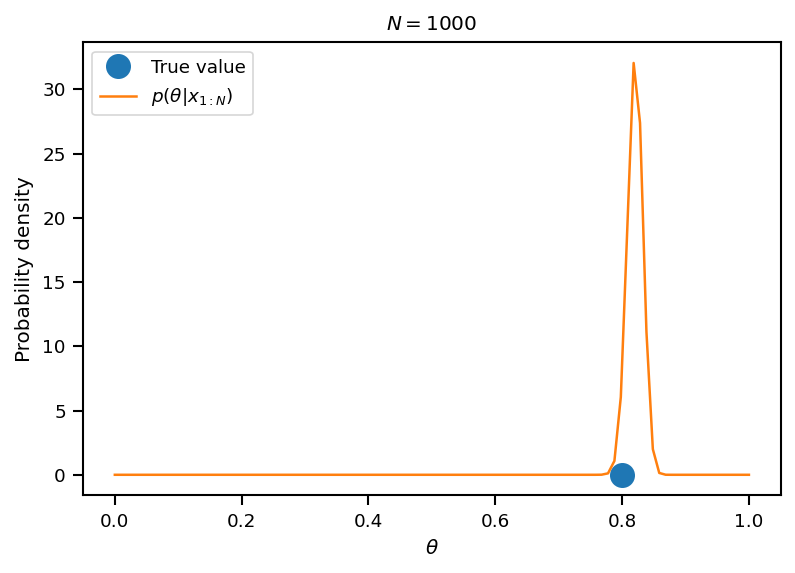

In [13]:
import scipy.stats as st
# Take a fake coin which is a little bit biased
theta_true = 0.8
# This is the random variable corresponding to a coin toss
X = st.bernoulli(theta_true)

# Sample from it a number of times to generate our data = (x1, ..., xN)
N = 1000
data = X.rvs(size=N)
# Now we are ready to calculate the posterior which the Beta we have above
alpha = 1.0 + data.sum()
beta = 1.0 + N - data.sum()
Theta_post = st.beta(alpha, beta)
# Now we can plot the posterior PDF for theta
fig, ax = plt.subplots(dpi=150)
thetas = np.linspace(0, 1, 100)
ax.plot([theta_true], [0.0], 'o', markeredgewidth=2, markersize=10, label='True value')
ax.plot(thetas, Theta_post.pdf(thetas), label=r'$p(\theta|x_{1:N})$')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Probability density')
ax.set_title('$N={0:d}$'.format(N))
plt.legend(loc='best')

## Questions

+ Try $N=0,5,10,100$ and see what happens.